# Inference Example: Fitting a Straight Line to the Cepheid Data

Goals:

* Apply some of the principles discussed in the ["Bayes Theorem"](bayes_theorem) and ["Generative Models"](generative_models.ipynb) notebooks to a simple example problem involving multiple datapoints.

* Carry out a Bayesian inference in `python`, where we derive, code up, evaluate, visualize and summarize the posterior PDF for our model parameters.

## Further reading

* [Hogg, Bovy & Lang (2010), "Data analysis recipes: Fitting a model to data"](https://arxiv.org/abs/1008.4686)

## A period-magnitude relation in Cepheid stars

* Cepheids star brightness oscillates with a stable period that appears to be strongly correlated with their mean luminosity (or absolute magnitude).

* The ["cepheids"](cepheids.ipynb) notebook provides an introduction to some Cepheid measurements reported by [Riess et al (2011)](https://arxiv.org/abs/1103.2976).

* Let's infer the parameters of a simple relationship between Cepheid period and, in the first instance, apparent magnitude.

<img src="graphics/cepheid_data.png" width=100%>

## Model

* Let's assume that Cepheid stars' luminosities are related to their oscillation periods by a power law, such that their apparent magnitude and log period follow the straight line relation

$\;\;\;\;\;\;\;m = a\;\log_{10} P + b$

* Our task is to infer the parameters $a$ and $b$ given the data, which consist of *observed magnitudes with quoted uncertainties*, such as: 

$\;\;\;\;\;\;\;m^{\rm obs} = 24.51 \pm 0.31$ at $\log_{10} P = \log_{10} (13.0/{\rm days})$

## Procedure

* "Inferring the parameters $a$ and $b$" means characterizing the posterior PDF for these parameters, given the data we have $(\boldsymbol{m}^{\rm obs})$ and the assumptions we make $(H)$.

* i.e., we seek the posterior PDF ${\rm Pr}(a,b|\boldsymbol{m}^{\rm obs},H)$

## Characterizing the posterior PDF

* From Bayes Theorem, we have that 


### $\;\;\;\;\;{\rm Pr}(a,b|\boldsymbol{m}^{\rm obs},H) = \frac{{\rm Pr}(\boldsymbol{m}^{\rm obs}|a,b,H) {\rm Pr}(a,b|H)}{{\rm Pr}(\boldsymbol{m}^{\rm obs}|H)}$

* ${\rm Pr}(\boldsymbol{m}^{\rm obs}|H)$ is, in this context, a normalization constant

* If we can evaluate the numerator of the righthand side of the above expression, we can compute the posterior PDF ${\rm Pr}(a,b|\boldsymbol{m}^{\rm obs},H)$ for any choice of parameters $(a,b)$, up to this constant.

* This numerator is just the factorization of the joint PDF for all variables that the PGM illustrates.

## Probabilistic Graphical Model

* Let's draw a PGM for this inverse problem, imagining our way through what we would do to generate a mock dataset like the one we have for each of the 9 NGC galaxy hosts in R11.

* If we were generating mock data, then for any plausible choice of parameters $a$ and $b$ we can predict the true magnitude $m_k$ of each star given its period $P_k$, and then add noise to simulate each observed magnitude $m^{\rm obs}_k$.

#### Exercise:  Draw the PGM for this problem with your neighbor, and be prepared to point out its features in 5 minutes' time

## PGM

<img width="512" src="graphics/pgms_cepheids.png"/>

## Approaching inference

* Recall: the PGM illustrates a particular factorization of the joint PDF for all variables in the problem - the one dictated by our model assumptions

* In an inverse problem, the data $m^{\rm obs}$ are constants, fixed by observation

* Other parameters of the model are fixed by assumption

> The magnitude uncertainties $\sigma^{\rm obs}$ are given to us in the data file; we can use them as-is if we believe them. The "true" magnitudes $m$ are _determined_ by our power law model.

## Approaching inference

* Let's write down the joint PDF corresponding to the above PGM, paying attention to the assumptions involved. 

## The sampling distribution ${\rm Pr}(\boldsymbol{m}^{\rm obs}|\boldsymbol{m},H)$

* We were given points ($m^{\rm obs}_k$) with error bars ($\sigma_k$), which suggests a *Gaussian* sampling distribution for each one:

$\;\;\;\;\;\;\;{\rm Pr}(m^{\rm obs}_k|m_k,\sigma_k,H) = \frac{1}{\sqrt{2\pi\sigma_k^2}} \exp{-\frac{(m^{\rm obs}_k - m_k)^2}{2\sigma_k^2}}$

> Note that we are not given the form of the sampling distribution: it has to be assumed. The Gaussian distribution is the _least committal_ (Maximum Entropy) choice given the information provided. 

## The sampling distribution ${\rm Pr}(\boldsymbol{m}^{\rm obs}|\boldsymbol{m},H)$

* If we assume that the measurements of each Cepheid start are *independent* of each other, then we can define *predicted and observed data vectors* $\boldsymbol{m}$ and $\boldsymbol{m}^{\rm obs}$ (plus a corresponding observational uncertainty vector $\boldsymbol{\sigma}$) via:

$\;\;\;\;\;\;\;{\rm Pr}(\boldsymbol{m}^{\rm obs}|\boldsymbol{m},\boldsymbol{\sigma},H) = \prod_k {\rm Pr}(m^{\rm obs}_k|m_k,\sigma_k,H)$

#### Question:  What would the PGM look like if we were unwilling to assume that the datapoints were independent? Discuss this problem with your neighbor, and be prepared to suggest PGM and formula modifications

## The conditional PDF ${\rm Pr}(m_k|a,b,\log_{10}{P_k},H)$

<img src="graphics/pgms_cepheids.png" width=60%>

## The conditional PDF ${\rm Pr}(m_k|a,b,\log_{10}{P_k},H)$

Our relationship between the intrinsic magnitude and the log period is linear and deterministic, indicating the following *delta-function* PDF:

$\;\;\;\;\;\;\;{\rm Pr}(m_k|a,b,\log_{10}{P_k},H) = \delta(m_k - a\log_{10}{P_k} - b)$

#### Question:  What would it mean to choose a distribution with non-zero width for this PDF?

## The resulting joint likelihood, ${\rm Pr}(\boldsymbol{m}^{\rm obs}|a,b,H)$

* The PDF for everything inside the PGM plate is the following product:

$\;\;\;\;\;\;\;{\rm Pr}(\boldsymbol{m}^{\rm obs}|\boldsymbol{m},\sigma,H)\;{\rm Pr}(\boldsymbol{m}|a,b,H)$

$\;\;\;\;\;\;\;\;\;\;\;\;\;\; = \prod_k {\rm Pr}(m^{\rm obs}_k|m_k,\sigma_k,H)\;\delta(m_k - a\log_{10}{P_k} - b)$

## Marginalizing out the latent variables

* The intrinsic magnitudes of each Cepheid $m_k$ are "latent variables," to be _marginalized out_:

$\;\;\;\;\;\;\;{\rm Pr}(\boldsymbol{m}^{\rm obs}|a,b,H) = \int {\rm Pr}(\boldsymbol{m}^{\rm obs}|\boldsymbol{m},\sigma,H)\;{\rm Pr}(\boldsymbol{m}|a,b,H)\; d\boldsymbol{m}$

$\;\;\;\;\;\;\;\;\;\;\;\;\;\; = \prod_k \int {\rm Pr}(m^{\rm obs}_k|m_k,\sigma_k,H)\;\delta(m_k - a\log_{10}{P_k} - b) dm_k$

$\;\;\;\;\;\;\; \longrightarrow {\rm Pr}(\boldsymbol{m}^{\rm obs}|a,b,H) = \prod_k {\rm Pr}(\boldsymbol{m}^{\rm obs}_k|(a\log{P_k} + b),\sigma_k,H)$

## The log likelihood

Taking logs, for numerical stability, the product in the joint likelihood becomes the following sum:

$\;\;\;\;\;\;\;\log {\rm Pr}(\boldsymbol{m}^{\rm obs}|a,b,H) = \sum_k \log {\rm Pr}(m^{\rm obs}_k|(a\log{P_k} + b),\sigma,H)$

which, substituting in our Gaussian form, gives us: 

$\;\log {\rm Pr}(\boldsymbol{m}^{\rm obs}|a,b,H) = -\frac{1}{2}\sum_k \log{2\pi\sigma_k^2} - \frac{1}{2} \sum_k \frac{(m^{\rm obs}_k - a\log{P_k} - b)^2}{\sigma_k^2}$

> Note that the log likelihood $\log {\rm Pr}(\boldsymbol{m}^{\rm obs}|a,b,H)$ is a function that can be evaluated, as a function of $a$ and $b$, at constant $\boldsymbol{m}^{\rm obs}$

## Chi-squared

* Astronomers often call the term in the log likelihood that depends on the parameters $\chi^2$ ("chi-squared"):

$\;\;\;\;\;\;\;\chi^2 = \sum_k \frac{(m^{\rm obs}_k - a\log{P_k} - b)^2}{\sigma_k^2}$

* $\chi^2$ is a "misfit" statistic, that quantifies the difference between "observed and predicted data." Under our assumptions, it's equal to -2 times the log likelihood (up to a constant). The "predicted data" are $m_k = a\log{P_k} - b$

## Including the prior ${\rm Pr}(a,b|H)$

* The final pieces of the joint PDF illustrated by the PGM are the PDFs for $a$ and $b$
<img src="../graphics/pgms_cepheids.png" width=60% align="right">

## Including the prior ${\rm Pr}(a,b|H)$

* The final pieces of the joint PDF illustrated by the PGM are the PDFs for $a$ and $b$, which we can assume to be independent

* The joint PDF is:

$\;\;\;\;\;\;\;{\rm Pr}(\boldsymbol{m}^{\rm obs},a,b|H) = {\rm Pr}(\boldsymbol{m}^{\rm obs}|a,b,H) {\rm Pr}(a|H) {\rm Pr}(b|H)$

> Since we marginalized out the $m$, analytically, we _could_ have drawn the PGM more simply, jumping directly to ${\rm Pr}(\boldsymbol{m}^{\rm obs}|a,b,H)$. However, it's often helpful to _explicitly_ distinguish between "true" parameters and observed data.

## Assigning the prior

* For now, let's assume a uniform prior PDF for $b$, supposing that we know roughly what size $b$ is (about 20).

* Since $a$ is the gradient of a line, let's assume a uniform prior in the angle of inclination $\theta$ of the line. With $a = \tan{\theta}$, this choice corresponds to a Cauchy distribution for $a$.

$\;\;\;\;\;\;\;{\rm Pr}(a|H) = \frac{1}{\pi}\frac{1}{1+a^2}\;\;{\rm for}\;\; -\infty < a < +\infty$

$\;\;\;\;\;\;\;{\rm Pr}(b|H) = \frac{1}{b_{\rm max} - b_{\rm min}}$ with $(b_{\rm min}, b_{\rm max}) = (10, 30)$

## Characterizing the posterior PDF

* With this completed factorization of the joint PDF for all variables, we have the following product: 

$\;\;{\rm Pr}(a,b|\boldsymbol{m}^{\rm obs},H) \propto {\rm Pr}(\boldsymbol{m}^{\rm obs}|a,b,H) {\rm Pr}(a|H) {\rm Pr}(b|H)$

* This means that we can evaluate the posterior PDF ${\rm Pr}(a,b|\boldsymbol{m}^{\rm obs},H)$ for any choice of parameters $(a,b)$, up to a normalization constant.

## Computing the posterior PDF

We can now code up functions for the log likelihood, the log prior, and the unnormalized log posterior, such that we can evaluate them on a 2D $(a,b)$ parameter grid.

In [5]:
exec(open('code/cepheids.py').read())
%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 8.0)

data = Cepheids('../examples/Cepheids/R11ceph.dat')

In [6]:
def log_likelihood(logP, mobs, sigma, a, b):
    return -0.5*np.sum(2*np.pi*sigma**2) - \
            0.5*np.sum((mobs - a*logP - b)**2/(sigma**2))

def log_prior(a, b):
    amin,amax = -10.0,10.0
    bmin,bmax = 10.0,30.0
    if (b > bmin)*(b < bmax):
        value = np.log(1.0/(bmax-bmin)) - \
                np.log(np.pi) - np.log(1 + a**2)
    else:
        value = -np.inf
    return value

def log_posterior(logP, mobs, sigma, a, b):
    return log_likelihood(logP,mobs,sigma,a,b) + log_prior(a,b)

## Evaluating the posterior PDF

Now, let's set up a suitable parameter grid, evaluate the unnormalized log posterior on it, and then renormalize it numerically.

In [7]:
# Limits of parameter grids, focused on the high likelihood region:
amin, amax = -3.4, -2.4
bmin, bmax = 25.7, 26.8
limits = (amin, amax, bmin, bmax)

def evaluate_posterior_on_a_grid(limits, NGC_ID=4258, npix=100):
    
    # Make grids:
    amin, amax, bmin, bmax = limits
    agrid, bgrid, logprob = np.linspace(amin,amax,npix), np.linspace(bmin,bmax,npix), np.zeros([npix,npix])

    # Select a Cepheid dataset:
    data.select(NGC_ID)

    # Loop over parameters, computing unnormlized log posterior PDF:
    for i,a in enumerate(agrid):
        for j,b in enumerate(bgrid):
            logprob[j,i] = log_posterior(data.logP, data.mobs, data.sigma, a, b)

    # Exponentiate and normalize to get posterior density:
    prob = np.exp(logprob - np.max(logprob))
    prob /= np.sum(prob)
    
    return prob, agrid, bgrid

In [8]:
%%time
prob, a, b = evaluate_posterior_on_a_grid(limits, NGC_ID=4258, npix=100)

CPU times: user 320 ms, sys: 10.7 ms, total: 331 ms
Wall time: 351 ms


## Visualizing the 2D PDF

* Typically we want to be able to see the centroid, size and shape of the posterior PDF

* In particular we want to see the _credible regions_ that enclose 68% and 95% of the posterior probability. These are best plotted as contours

* Given our assumption that the model is true, the probability that the true values of the model parameters lie within the 95% credible region given the data is 0.95

## Visualizing the 2D PDF

Text(0,0.5,'intercept b / AB magnitudes')

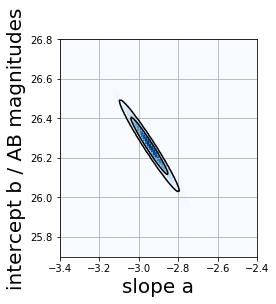

In [9]:
sorted = np.sort(prob.flatten())
C = sorted.cumsum()

# Find the pixel values that lie at the levels that contain 68% and 95% of the probability:
lvl68 = np.min(sorted[C > (1.0 - 0.68)])
lvl95 = np.min(sorted[C > (1.0 - 0.95)])

plt.imshow(prob, origin='lower', cmap='Blues', interpolation='none', extent=limits)
plt.contour(prob,[lvl95,lvl68],colors='black',extent=limits)
plt.grid()
plt.xlabel('slope a', fontsize=20)
plt.ylabel('intercept b / AB magnitudes', fontsize=20)

## Post-inference model checking


* Are these inferred parameters sensible? 

* Let's read off a plausible (a,b) pair and overlay the model period-magnitude relation on the data.

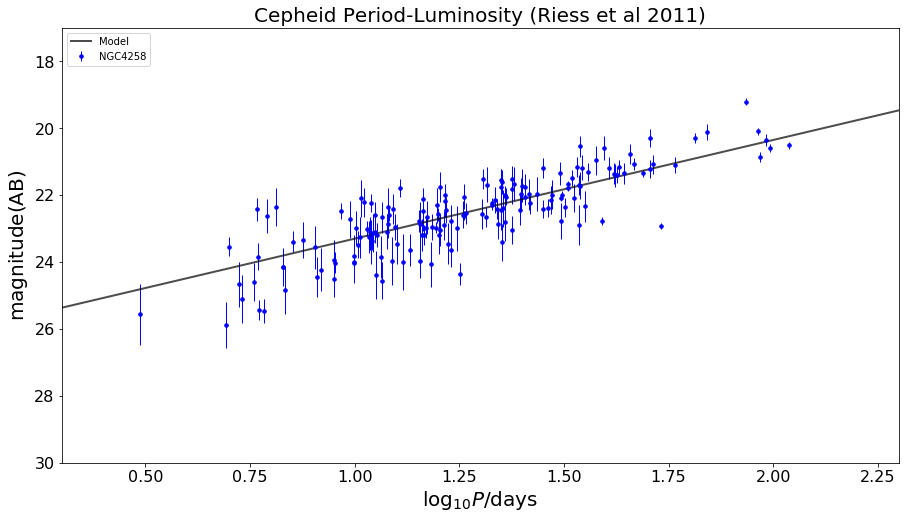

In [10]:
data.plot(4258)

data.overlay_straight_line_with(a=-2.95, b=26.25, label='Model')

data.add_legend()

## Summarizing our inferences

* Typically, we will want to (or will be expected to) report "answers" for our model parameters

* This can be difficult: our result _is_ the posterior PDF for the model parameters given the data!

* A convenient, and in this case appropriate, choice is to report quantiles of the 1D marginalized PDFs

> In general, the most important thing when summarizing inferences is to state clearly what you are doing, preferably with critical commentary

## Summarizing our inferences

Let's compute the 1D marginalized posterior PDFs for $a$ and for $b$, and report the median and "68% credible interval" (defined as the region of 1D parameter space enclosing 68% of the posterior probability).

In [11]:
prob_a_given_data = np.sum(prob, axis=0) # Approximate the integral as a sum
prob_b_given_data = np.sum(prob, axis=1) # Approximate the integral as a sum

In [12]:
# Check that we do have a 1D PDF:
print(prob_a_given_data.shape, np.sum(prob_a_given_data))

(100,) 1.0


## 1D marginalized posterior PDFs

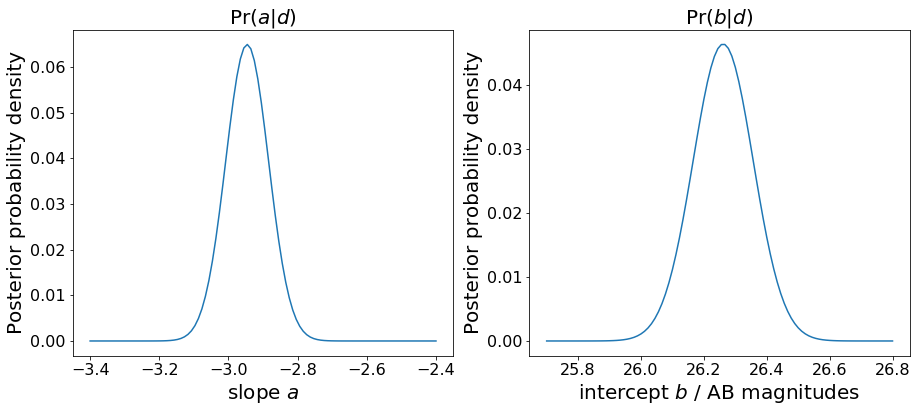

In [13]:
plot_1d_marginalized_pdfs(a, b, prob_a_given_data, prob_b_given_data)

## 1D marginalized PDF summaries

In [14]:
print("a = ",compress_1D_pdf(a, prob_a_given_data, ci=68, dp=2))

print("b = ",compress_1D_pdf(b, prob_b_given_data, ci=68, dp=2)) 

a =  $ -2.95^{+0.06}_{-0.06} $
b =  $ 26.27^{+0.09}_{-0.1} $


## Notes

* In this simple case, our report makes sense: the medians of both 1D marginalized PDFs lie within the region of high 2D posterior PDF. *This will not always be the case.*


* The marginalized posterior for $x$ has a well-defined meaning, regardless of the higher dimensional structure of the joint posterior:  it is ${\rm Pr}(x|d,H)$, the PDF for $x$ given the data and the model, and *accounting for the uncertainty in all other parameters*.


* The posterior PDF we computed is close to, but not quite, a bivariate Gaussian. What choice of (proper) prior would we have had to make in order for the posterior PDF to be _exactly_ Gaussian?

## Exercise: the cost of grid evaluation

Brute force computation of poeterior PDFs is computationally expensive. With your partner, work out an approximate expression of the form $t \sim f(N, P, q)$ for how the CPU time $t$ should scale with 

* $N$, the number of datapoints

* $P$, the number of parameter dimensions ($P=2$ in the straight line example) 

* $q$, the number of pixels along each dimension of the parameter grid (in the above code $q$ = `npix`)

Here, $f$ is some simple function. 

> You can assume that all floating point operations take the same amount of CPU time, and that this prefactor is unimportant - we are only interested in how the computational expense _scales_

## Exercise: the cost of grid evaluation

Check your scaling with `npix` by re-running the code in this notebook:

In [15]:
%%time
q = 10
prob, a, b = evaluate_posterior_on_a_grid(limits, NGC_ID=4258, npix=q)

CPU times: user 4.28 ms, sys: 507 µs, total: 4.79 ms
Wall time: 4.37 ms


## Exercise: the cost of grid evaluation

Now work out a similar scaling with $N$, $P$ and $q$ for the numerical integration needed to obtain _all $P$ 1D marginalized distributions_.

## Take-home messages

* Bayes theorem tells us how to compute the posterior PDF for our model parameters


* Sets of independent measurements lead to simple products of likelihood terms


* For numerical stability we always work with the _log_ likelihood and _log_ posterior


* Evaluating and marginalizing the posterior PDF on a numerical grid is simple but inefficient